<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/reduced_3body_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

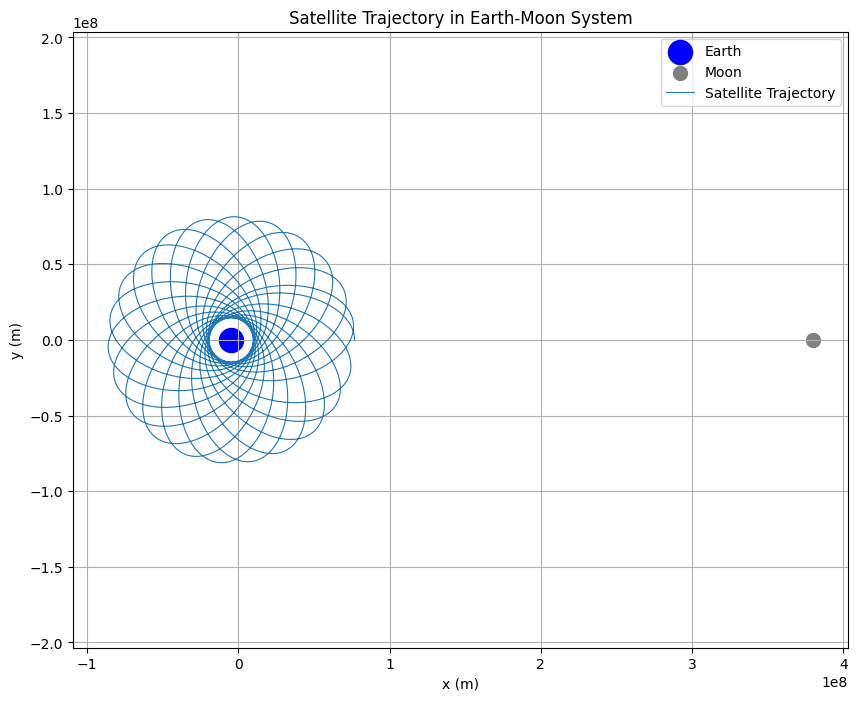

In [30]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants in SI units
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2

# Earth-Moon system parameters
M_earth = 5.972e24  # Mass of the Earth, kg
M_moon = 7.347e22  # Mass of the Moon, kg
d_earth_moon = 3.844e8  # Distance between Earth and Moon, m
omega = 2.662e-6  # Angular velocity of the Moon's orbit, rad/s

# Reduced mass parameter
mu = M_moon / (M_earth + M_moon)

# Define the equations of motion for the restricted three-body problem
def earth_moon_satellite(t, state):
    x, y, vx, vy = state

    # Distances to Earth and Moon
    r1 = np.sqrt((x + mu * d_earth_moon)**2 + y**2)
    r2 = np.sqrt((x - (1 - mu) * d_earth_moon)**2 + y**2)

    # Accelerations
    ax = 2 * omega * vy + omega**2 * x - G * M_earth * (x + mu * d_earth_moon) / r1**3 \
         - G * M_moon * (x - (1 - mu) * d_earth_moon) / r2**3
    ay = -2 * omega * vx + omega**2 * y - G * M_earth * y / r1**3 - G * M_moon * y / r2**3

    return [vx, vy, ax, ay]

# Initial conditions for the satellite
x0 = 3.844e8 * 0.2  # Start at 20% of the distance to the Moon, m
y0 = 0.0  # Aligned with Earth-Moon axis, m
vx0 = 0.0  # Initial velocity in x, m/s
vy0 = 1000.0  # Initial velocity in y, m/s

# Time span for the simulation
t_span = (0, 27.32 * 24 * 3600)  # One lunar orbit, seconds
t_eval = np.linspace(0, t_span[1], 10000)

# Solve the equations of motion
state_0 = [x0, y0, vx0, vy0]
solution = solve_ivp(earth_moon_satellite, t_span, state_0, t_eval=t_eval, method='RK45', rtol=1e-8, atol=1e-8)

# Extract the positions of the satellite
x = solution.y[0]
y = solution.y[1]

# Plot the trajectory
plt.figure(figsize=(10, 8))

# Plot Earth and Moon
plt.scatter(-mu * d_earth_moon, 0, color='blue', label='Earth', s=300)
plt.scatter((1 - mu) * d_earth_moon, 0, color='gray', label='Moon', s=100)

# Plot the satellite trajectory
plt.plot(x, y, label='Satellite Trajectory', lw=0.8)

# Add labels and legend
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Satellite Trajectory in Earth-Moon System")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


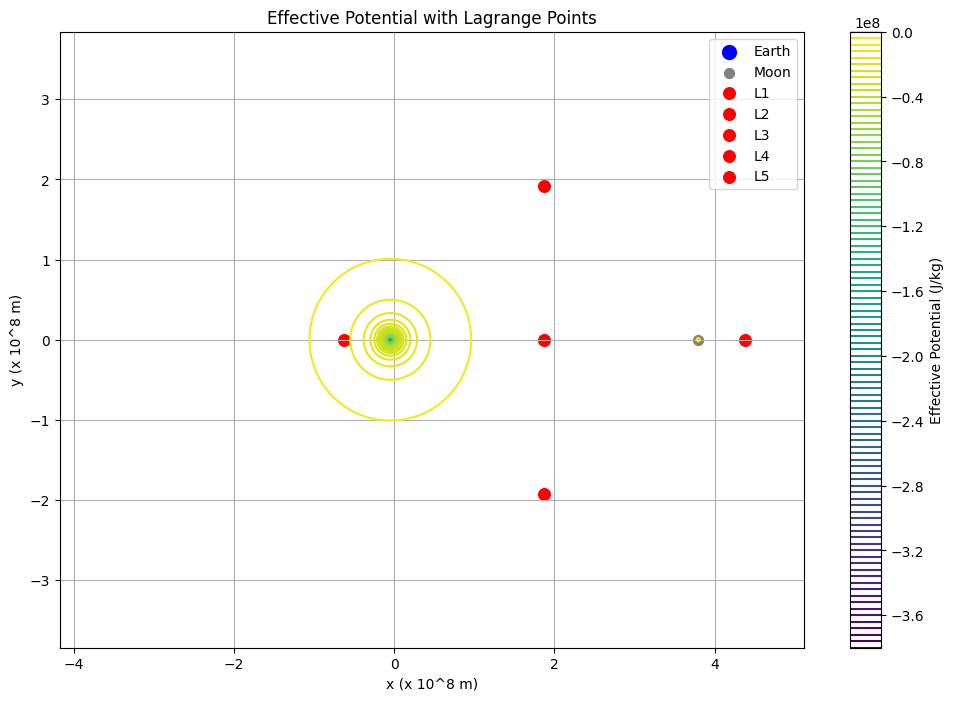

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in SI units
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2

# Earth-Moon system parameters
M_earth = 5.972e24  # Mass of the Earth, kg
M_moon = 7.347e22  # Mass of the Moon, kg
d_earth_moon = 3.844e8  # Distance between Earth and Moon, m

# Positions of Earth and Moon in the coordinate system
x1_0, y1_0 = -M_moon / (M_earth + M_moon) * d_earth_moon, 0  # Earth
x2_0, y2_0 = (1 - M_moon / (M_earth + M_moon)) * d_earth_moon, 0  # Moon

# Approximate locations of Lagrange points (can be refined)
lagrange_points = [
    ((x1_0 + x2_0) / 2, 0),  # L1 (approximate)
    (x2_0 + d_earth_moon * 0.15, 0),  # L2 (approximate)
    (x1_0 - d_earth_moon * 0.15, 0),  # L3 (approximate)
    ((x1_0 + x2_0) / 2, d_earth_moon * 0.5),  # L4 (approximate)
    ((x1_0 + x2_0) / 2, -d_earth_moon * 0.5)  # L5 (approximate)
]

# Create a grid for the x and y coordinates
X, Y = np.meshgrid(np.linspace(-d_earth_moon, d_earth_moon, 500),
                   np.linspace(-d_earth_moon, d_earth_moon, 500))

# Effective potential field
r1 = np.sqrt((X - x1_0)**2 + (Y - y1_0)**2)
r2 = np.sqrt((X - x2_0)**2 + (Y - y2_0)**2)

# Add centrifugal potential to effective potential
omega = np.sqrt(G * (M_earth + M_moon) / d_earth_moon**3)
centrifugal = -0.5 * omega**2 * (X**2 + Y**2)
potential = -G * M_earth / r1 - G * M_moon / r2 + centrifugal

# Plot the contour of the effective potential
plt.figure(figsize=(12, 8))
contour = plt.contour(X / 1e8, Y / 1e8, potential, levels=100, cmap="viridis")
plt.colorbar(contour, label="Effective Potential (J/kg)")

# Mark the Earth and Moon
plt.scatter(x1_0 / 1e8, y1_0 / 1e8, color='blue', label='Earth', s=100)
plt.scatter(x2_0 / 1e8, y2_0 / 1e8, color='gray', label='Moon', s=50)

# Mark the Lagrange points
for i, (x_l, y_l) in enumerate(lagrange_points, start=1):
    plt.scatter(x_l / 1e8, y_l / 1e8, color='red', label=f'L{i}' if i <= 5 else None, s=70)

# Add labels and legend
plt.xlabel("x (x 10^8 m)")
plt.ylabel("y (x 10^8 m)")
plt.title("Effective Potential with Lagrange Points")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


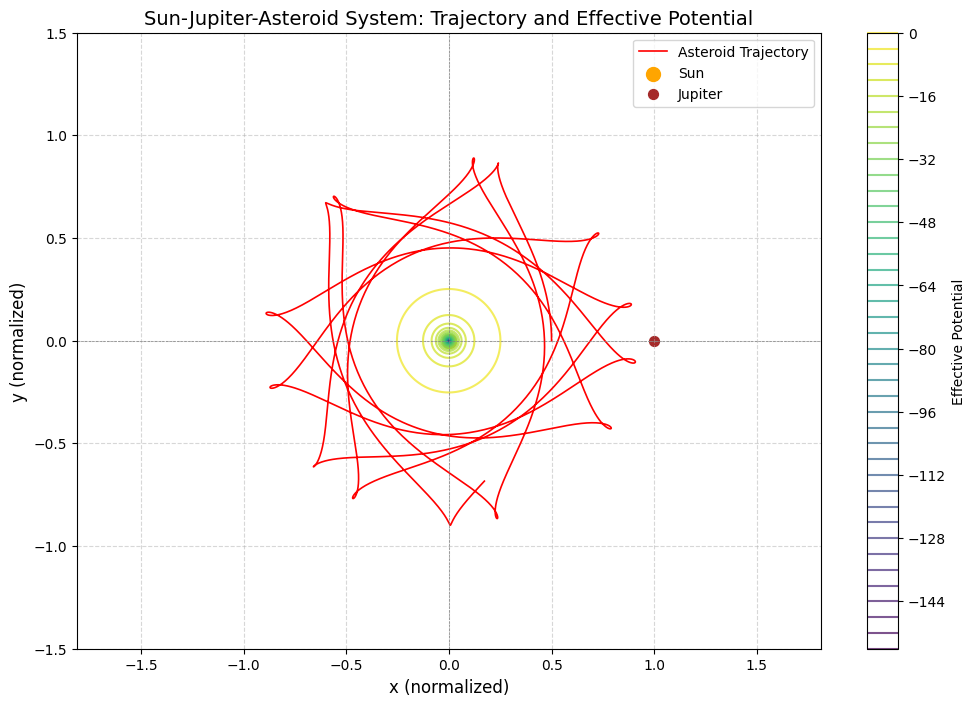

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 1.0  # Gravitational constant (normalized)
M_sun = 1.0  # Mass of the Sun (normalized)
M_jupiter = 0.001  # Mass of Jupiter (normalized)
mu = M_jupiter / (M_sun + M_jupiter)  # Mass ratio

# Jupiter-Sun distance (normalized to 1)
r_sun_jupiter = 1.0

# Function to compute the derivatives of the system
def equations(t, state):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)  # Distance to the Sun
    r2 = np.sqrt((x - (1 - mu))**2 + y**2)  # Distance to Jupiter

    # Accelerations
    ax = 2 * vy + x - (1 - mu) * (x + mu) / r1**3 - mu * (x - (1 - mu)) / r2**3
    ay = -2 * vx + y - (1 - mu) * y / r1**3 - mu * y / r2**3

    return [vx, vy, ax, ay]

# Initial conditions for the asteroid
x0 = 0.5  # Initial x-position
y0 = 0.0  # Initial y-position
vx0 = 0.0  # Initial x-velocity
vy0 = 1.1  # Initial y-velocity

# Time span for integration
t_span = (0, 50)  # Time interval
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # Time points for evaluation

# Solve the differential equations
initial_state = [x0, y0, vx0, vy0]
solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval, rtol=1e-9)

# Extract the solution
x, y = solution.y[0], solution.y[1]

# Define the effective potential function
def effective_potential(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)  # Distance to the Sun
    r2 = np.sqrt((x - (1 - mu))**2 + y**2)  # Distance to Jupiter
    omega = 0.5 * (x**2 + y**2) + (1 - mu) / r1 + mu / r2
    return -omega

# Generate a grid for the potential field
x_grid = np.linspace(-1.5, 1.5, 300)
y_grid = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x_grid, y_grid)
Z = effective_potential(X, Y, mu)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the potential contours
plt.contour(X, Y, Z, levels=40, cmap='viridis', alpha=0.7)
plt.colorbar(label="Effective Potential")

# Plot the trajectory of the asteroid
plt.plot(x, y, 'r', label='Asteroid Trajectory', linewidth=1.2)

# Mark the positions of the Sun and Jupiter
plt.scatter(-mu, 0, color='orange', s=100, label='Sun')  # Sun's position
plt.scatter(1 - mu, 0, color='brown', s=50, label='Jupiter')  # Jupiter's position

# Configure the plot
plt.title("Sun-Jupiter-Asteroid System: Trajectory and Effective Potential", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


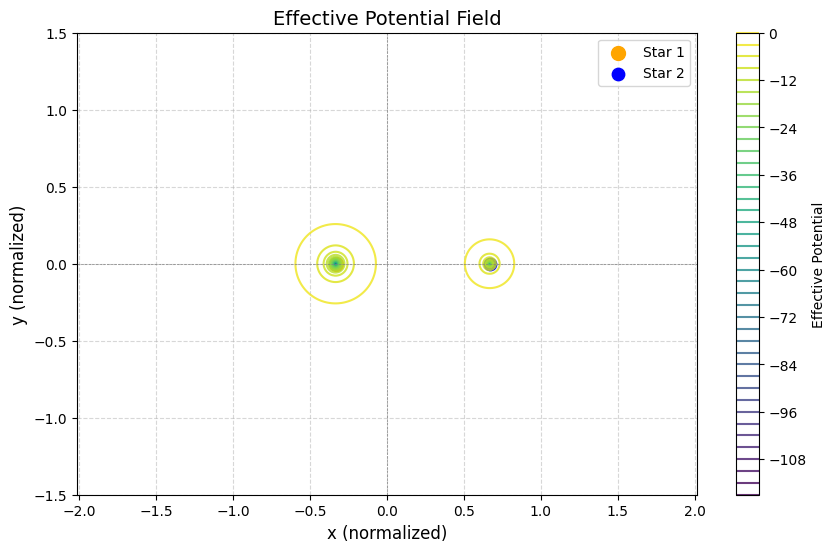

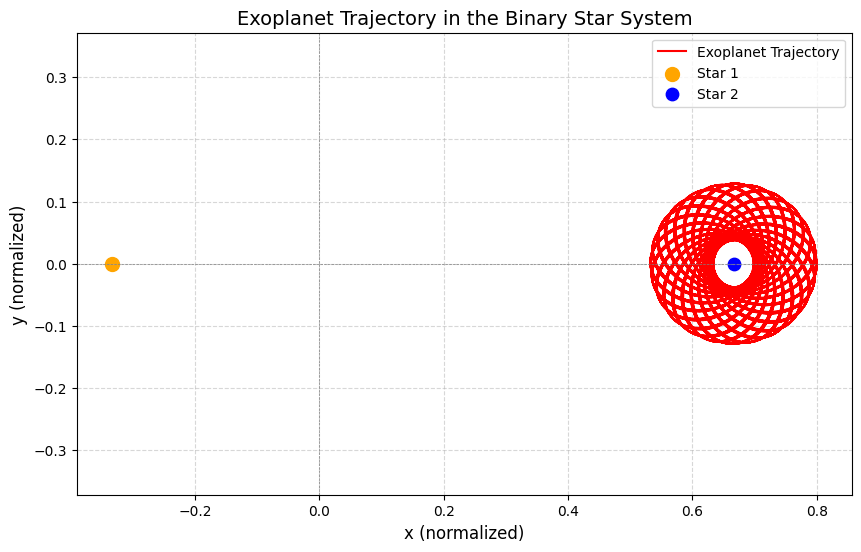

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 1.0  # Gravitational constant (normalized)
M1 = 1.0  # Mass of the first star (normalized)
M2 = 0.5  # Mass of the second star (normalized)
mu = M2 / (M1 + M2)  # Mass ratio

# Distance between the two stars (normalized to 1)
r_star = 1.0

# Function to compute the derivatives of the system
def equations(t, state):
    x, y, vx, vy = state
    r1 = np.sqrt((x + mu)**2 + y**2)  # Distance to the first star
    r2 = np.sqrt((x - (1 - mu))**2 + y**2)  # Distance to the second star

    # Accelerations
    ax = 2 * vy + x - (1 - mu) * (x + mu) / r1**3 - mu * (x - (1 - mu)) / r2**3
    ay = -2 * vx + y - (1 - mu) * y / r1**3 - mu * y / r2**3

    return [vx, vy, ax, ay]

# Initial conditions for the exoplanet
x0 = 0.8  # Initial x-position
y0 = 0.0  # Initial y-position
vx0 = 0.0  # Initial x-velocity
vy0 = 0.9  # Initial y-velocity

# Time span for integration
t_span = (0, 50)  # Time interval
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # Time points for evaluation

# Solve the differential equations
initial_state = [x0, y0, vx0, vy0]
solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval, rtol=1e-9)

# Extract the solution
x, y = solution.y[0], solution.y[1]

# Define the effective potential function
def effective_potential(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)  # Distance to the first star
    r2 = np.sqrt((x - (1 - mu))**2 + y**2)  # Distance to the second star
    omega = 0.5 * (x**2 + y**2) + (1 - mu) / r1 + mu / r2
    return -omega

# Generate a grid for the potential field
x_grid = np.linspace(-1.5, 1.5, 300)
y_grid = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x_grid, y_grid)
Z = effective_potential(X, Y, mu)

# Plot the effective potential field
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=40, cmap='viridis', alpha=0.8)
plt.colorbar(label="Effective Potential")
plt.scatter(-mu, 0, color='orange', s=100, label='Star 1')  # First star
plt.scatter(1 - mu, 0, color='blue', s=80, label='Star 2')  # Second star
plt.title("Effective Potential Field", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot the trajectory of the exoplanet
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r', label='Exoplanet Trajectory', linewidth=1.5)
plt.scatter(-mu, 0, color='orange', s=100, label='Star 1')  # First star
plt.scatter(1 - mu, 0, color='blue', s=80, label='Star 2')  # Second star
plt.title("Exoplanet Trajectory in the Binary Star System", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
